In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn; seaborn.set()
import datetime
import seaborn as sns; sns.set()
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [9]:
data=pd.read_csv('BTC.csv')
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,01/05/2021,57714.66,58448.34,57052.27,57828.05,42836427360,1081174515343
1,02/05/2021,57825.86,57902.59,56141.91,56631.08,38177405335,1058862005057
2,03/05/2021,56620.27,58973.31,56590.87,57200.29,51713139031,1069563935453
3,04/05/2021,57214.18,57214.18,53191.43,53333.54,68564706967,997324142593
4,05/05/2021,53252.16,57911.36,52969.06,57424.01,69241316747,1073873012867
...,...,...,...,...,...,...,...
118,27/08/2021,46894.56,49112.79,46394.28,49058.67,34511076995,922265559164
119,28/08/2021,49072.59,49283.51,48499.24,48902.40,28568103401,919372790254
120,29/08/2021,48911.25,49644.11,47925.86,48829.83,25889650240,918057300166
121,30/08/2021,48834.85,48925.61,46950.27,47054.98,31847007016,884727824089


In [12]:
data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,01/05/2021,57714.66,58448.34,57052.27,57828.05,42836427360,1081174515343
1,02/05/2021,57825.86,57902.59,56141.91,56631.08,38177405335,1058862005057
2,03/05/2021,56620.27,58973.31,56590.87,57200.29,51713139031,1069563935453
3,04/05/2021,57214.18,57214.18,53191.43,53333.54,68564706967,997324142593
4,05/05/2021,53252.16,57911.36,52969.06,57424.01,69241316747,1073873012867


In [13]:
data.tail()

,Date,Open,High,Low,Close,Volume,Market Cap
118,27/08/2021,46894.56,49112.79,46394.28,49058.67,34511076995,922265559164
119,28/08/2021,49072.59,49283.51,48499.24,48902.40,28568103401,919372790254
120,29/08/2021,48911.25,49644.11,47925.86,48829.83,25889650240,918057300166
121,30/08/2021,48834.85,48925.61,46950.27,47054.98,31847007016,884727824089
122,31/08/2021,47024.34,48189.55,46750.09,47166.69,34730363427,886869903603


In [14]:
data.describe()

,Open,High,Low,Close,Volume,Market Cap
count,123.000000,123.000000,123.000000,123.000000,1.230000e+02,1.230000e+02
mean,40732.986748,41968.682276,39215.341789,40649.353333,4.065056e+10,7.620954e+11
std,7653.154473,7723.347611,7546.364025,7514.317141,1.792039e+10,1.407085e+11
min,29796.290000,31006.190000,28893.620000,29807.350000,1.878799e+10,5.592443e+11
25%,34633.255000,35426.090000,33413.780000,34632.855000,2.874077e+10,6.487613e+11
50%,38392.620000,39835.140000,36441.730000,38402.220000,3.546075e+10,7.188294e+11
75%,46566.270000,47594.545000,45028.635000,46586.820000,4.636863e+10,8.728682e+11
max,58877.390000,59519.350000,57052.270000,58803.780000,1.263581e+11,1.099864e+12


In [ ]:
data.drop(['Open', 'High', 'Low', 'Volume', 'Market Cap'],axis=1,inplace=True)
data

In [ ]:
dateindex=pd.DatetimeIndex(data['Date'])

In [ ]:
data.drop('Date',axis=1,inplace=True)

In [45]:
data

,Close
Date,
2021-01-05,57828.05
2021-02-05,56631.08
2021-03-05,57200.29
2021-04-05,53333.54
2021-05-05,57424.01
...,...
2021-08-27,49058.67
2021-08-28,48902.40
2021-08-29,48829.83


In [ ]:
data.plot()

#### Auto-correlation Function (ACF)

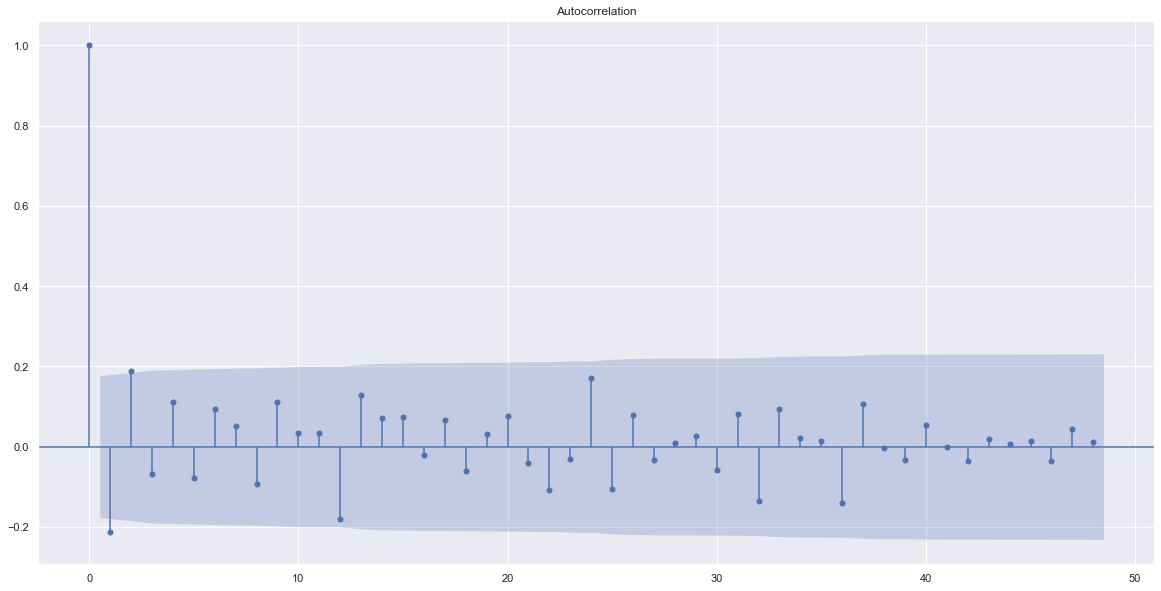

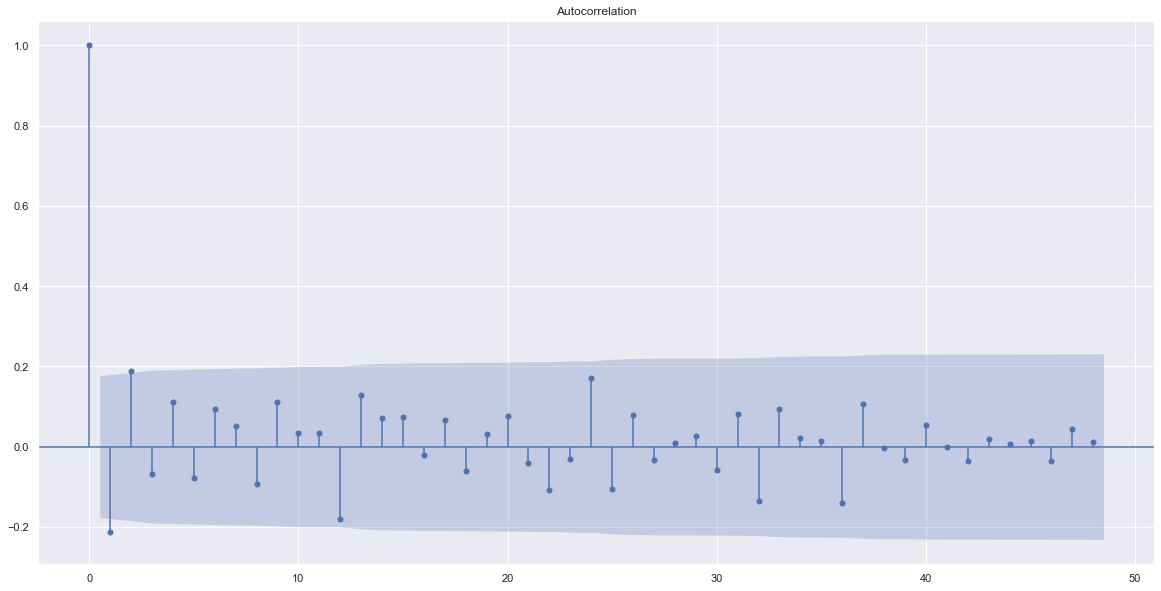

In [65]:
plot_acf(data.diff().dropna(), lags= 48, alpha=0.05)

#### Augmented Dicky-Fuller Test (ADF)

In [55]:
def Dickey_Fuller_Test(x):
    dickey_fuller = sm.tsa.stattools.adfuller(x)
    print(f'Dickey-Fuller p = {dickey_fuller[1]}')
    if dickey_fuller[1] > 0.05:
        print('Time series is non-stationary.')
    else:
        print('Time series is stationary.')

In [66]:
from statsmodels.tsa.stattools import adfuller
adfuller(data)[1]

0.05098313417610551

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
train,test = train_test_split(data,test_size=0.24,shuffle=False)
from statsmodels.tsa.arima.model import ARIMA
mod = ARIMA(data, order=(0,1,0))
result = mod.fit()

history = [x for x in train]
predictions = list()
for i in range(len(test)):
    # Predict
    model = ARMA(history,order=(5,1))
    model_fit = mod.fit()
    yhat = model_fit.forecast()
    yhat_p = model_fit.predict(start=len(history), end=len(history))[0]
    predictions.append(yhat_p)
    # Observe
    obs = test[i] 
    history.append(obs)
    print(str(yhat_p)+' '+' '+ str(history[-4:])+' '+str(obs)+' '+str(i)+' ')

In [74]:
new_data = data.groupby('Date')['Close'].sum().reset_index()
new_data

,Date,Close
0,2021-01-05,57828.05
1,2021-01-06,36684.92
2,2021-01-07,33572.12
3,2021-01-08,39974.90
4,2021-02-05,56631.08
...,...,...
118,2021-11-08,45593.64
119,2021-12-05,49150.53
120,2021-12-06,35552.52
121,2021-12-07,33155.85


In [76]:
new_data['Date'] = pd.to_datetime(new_data['Date'], infer_datetime_format=True)

In [77]:
df = new_data.set_index(['Date'])
type(df)

pandas.core.frame.DataFrame

In [78]:
new_df = df['Close'].resample('D').mean()
type(new_df)

pandas.core.series.Series

In [79]:
new_df.describe()

count      123.000000
mean     40649.353333
std       7514.317141
min      29807.350000
25%      34632.855000
50%      38402.220000
75%      46586.820000
max      58803.780000
Name: Close, dtype: float64

In [ ]:
new_df.plot()

In [82]:
values = DataFrame(new_df.values)
print(values)

            0
0    57828.05
1    36684.92
2    33572.12
3    39974.90
4         NaN
..        ...
333       NaN
334  49150.53
335  35552.52
336  33155.85
337  44428.29

[338 rows x 1 columns]


In [ ]:
p = 1
dataframe = concat([values.shift(p), values], axis=1)
print(dataframe)

#### Calculation of Prediction Accuracy

In [ ]:
from sklearn.metrics import r2_score
r_squre = r2_score(test, predictions)
print("r2_score:", r_squre)

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test, predictions)
print('MAE: %f' % mae)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(test, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

In [ ]:
errors = abs(test - predictions)
mape = 100 * (errors / test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')